# WebScarping

In [ ]:
import requests
import zipfile
import io

# Obtencion y descompresion de archivo Zip en ruta de destino
# URL del archivo ZIP a descargar
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/recorridos-realizados-2021.zip"

# Ruta de la carpeta donde se extraerá el contenido del ZIP
ruta_destino = "./"

# Descargar el archivo ZIP
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extraer el contenido del ZIP en la carpeta de destino
zip_file.extractall(ruta_destino)
zip_file.close()

print("¡Extracción completada!")


# Limpieza y preparacion

### Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import os

### Lectura de CSV

In [ ]:
datos = pd.read_csv('./trips_2021.csv')

<ipython-input-3-c7ce5caa2b98>:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv('./trips_2021.csv')


In [ ]:
#Se comprueba si ya se descargo el csv
# Ruta de la carpeta que deseas comprobar
carpeta = '../../datos/brutos/'
# Obtener la lista de archivos y directorios en la carpeta
archivos = os.listdir(carpeta)

FileNotFoundError: ignored

In [ ]:
#Si no esta el .csv, se descarga por medio del modulo de webscraping
if len(archivos) <=1:
    ws

datos = pd.read_csv('../../datos/brutos/trips_2021.csv')

In [ ]:
datos

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,Género
0,1,9920899BAEcobici,"2,026",2021-01-26 19:58:12,86BAEcobici,086 - SAAVEDRA,1019 Saavedra,-58.401681,-34.621268,2021-01-26 20:31:58,8BAEcobici,008 - Congreso,"Cevallos, Virrey& Yrigoyen, Hipolito Av.",-34.609422,"-34.6094218,-58.3893364",289347BAEcobici,ICONIC,OTHER,NaN
1,2,9918792BAEcobici,"1,474",2021-01-26 17:37:33,197BAEcobici,197 - PLAZA CIUDAD DE UDINE,Mercedes 1480,-58.493044,-34.620998,2021-01-26 18:02:07,9BAEcobici,009 - Parque Las Heras,"2300 Diaz, Cnel. Av. & French",-34.585443,"-34.585443,-58.407741",637104BAEcobici,ICONIC,OTHER,NaN
2,3,9917121BAEcobici,629,2021-01-26 15:24:59,165BAEcobici,165 - PLAZA MONSEÑOR MIGUEL DE ANDREA,Dr Tomas Manuel De Anchorena & Jose A. Cabrera,-58.407614,-34.597048,2021-01-26 15:35:28,13BAEcobici,013 - ONCE,Av. Pueyrredon & Av. Rivadavia,-34.610090,"-34.61009,-58.406",709319BAEcobici,ICONIC,FEMALE,NaN
3,4,9919277BAEcobici,616,2021-01-26 18:11:22,20BAEcobici,020 - DISTRITO AUDIOVISUAL,Conde & Concepción Arenal,-58.444327,-34.580975,2021-01-26 18:21:38,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-34.577424,"-34.577424,-58.426387",114280BAEcobici,ICONIC,FEMALE,NaN
4,5,9921579BAEcobici,684,2021-01-26 20:38:30,44BAEcobici,044 - Ecoparque,"Av. Del Libertador, 3260",-58.413883,-34.575515,2021-01-26 20:49:54,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-34.577424,"-34.577424,-58.426387",641027BAEcobici,ICONIC,FEMALE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860086,2860087,12948481BAEcobici,"1,578",2021-12-10 18:28:41,96BAEcobici,096 - Carlos Gardel,3302 Guardia Vieja & Aguero,-58.411659,-34.602781,2021-12-10 18:54:59,424BAEcobici,387 - Luna,201 Luna,-34.638584,"-34.638584,-58.39965",711510BAEcobici,FIT,NaN,MALE
2860087,2860088,12941783BAEcobici,"3,008",2021-12-10 10:36:28,316BAEcobici,205 - SAN MARTIN,1471 Cucha Cucha,-58.453475,-34.605567,2021-12-10 11:26:36,435BAEcobici,227 -Club Ciudad de Buenos Aires,Miguel Sanchez y Av Libertadores,-34.544503,"-34.544503,-58.459499",166252BAEcobici,FIT,NaN,MALE
2860088,2860089,12947405BAEcobici,"2,072",2021-12-10 17:29:34,385BAEcobici,268 - Plaza Aristóbulo Del Valle,Campana Y MARCOS SASTRE,-58.493141,-34.606160,2021-12-10 18:04:06,457BAEcobici,110 - PLAZA CD DE BANFF,ROMA 786,-34.628050,"-34.62805,-58.52174",336848BAEcobici,FIT,NaN,MALE
2860089,2860090,12942998BAEcobici,"1,246",2021-12-10 12:36:07,299BAEcobici,221 - CULPINA,Culpina 121,-58.466143,-34.631705,2021-12-10 12:56:53,458BAEcobici,219 - Parque Chacabuco II,ASAMBLEA 1400,-34.636275,"-34.636275,-58.444041",786187BAEcobici,FIT,NaN,FEMALE


## Trabajando con columnas y tipo de datos

### Eliminacion de columnas

In [ ]:
datos = datos.drop(['Unnamed: 0', 'id_estacion_origen', 'id_estacion_destino','long_estacion_destino', 'lat_estacion_destino', 'long_estacion_origen', 'lat_estacion_origen' ], axis=1)

#### Unificando columnas

In [ ]:
#Se crea funcion que modficara el dataframe en la columna genero
def genero_row(row):
    # Comprobar si la columna vacía está vacía y la columna de reemplazo no está vacía
    if pd.isnull(row['género']) and pd.notnull(row['Género']):
        row['género'] = row['Género']

    return row

In [ ]:
datos = datos.apply(genero_row, axis=1)

In [ ]:
#Se elimina la segunda columna de valores respecto al genero
datos = datos.drop('Género', axis=1)

### Se renombran columnas

In [ ]:
datos = datos.rename(columns={'género':'usuario_genero', 'duracion_recorrido':'duracion_recorrido_segundos', 'Id_recorrido':'id_recorrido' })

### Datos columna

#### ¿Qué tipo de dato son las variables del conjunto de datos?

In [ ]:
#Muestra las columnas y el tipo de dato de las mismas
datos.dtypes

id_recorrido                    object
duracion_recorrido_segundos      int64
nombre_estacion_origen          object
direccion_estacion_origen       object
long_estacion_origen           float64
lat_estacion_origen            float64
nombre_estacion_destino         object
direccion_estacion_destino      object
long_estacion_destino          float64
lat_estacion_destino            object
id_usuario                      object
modelo_bicicleta                object
usuario_genero                  object
origen_anio                      int64
origen_mes                       int64
origen_dia                       int64
origen_hora                      int64
origen_minuto                    int64
destino_anio                     int64
destino_mes                      int64
destino_dia                      int64
destino_hora                     int64
destino_minuto                   int64
dtype: object

#### Columnas de fechas

In [ ]:
#Se pasan las columnas relativas a las fechas a formato datetime
datos.fecha_origen_recorrido =pd.to_datetime(datos['fecha_origen_recorrido'])
datos.fecha_destino_recorrido=pd.to_datetime(datos['fecha_destino_recorrido'])

##### Fecha origen

In [ ]:
# Crear las nuevas columnas a partir de la columna compuesta
datos['origen_anio_mes_dia'] = datos['fecha_origen_recorrido'].dt.strftime('%Y-%m-%d')
datos['origen_hora_minuto_segundos'] = datos['fecha_origen_recorrido'].dt.strftime('%H:%M:%S')

In [ ]:
# Separar la columna 'anio_mes_dia' en columnas 'anio', 'mes' y 'dia'
datos[['origen_anio', 'origen_mes', 'origen_dia']] = datos['origen_anio_mes_dia'].str.split('-', expand=True)
datos[['origen_hora', 'origen_minuto', 'origen_segundos']] = datos['origen_hora_minuto_segundos'].str.split(':', expand=True)

In [ ]:
#Se eliminan la columna compuesta de 'destino_hora_minuto_segundos' y la columna de 'destino_segundos'
datos = datos.drop(['origen_hora_minuto_segundos', 'origen_anio_mes_dia', 'origen_segundos', 'fecha_origen_recorrido'], axis = 1)

##### Fecha destino

In [ ]:
# Crear las nuevas columnas a partir de la columna compuesta
datos['destino_anio_mes_dia'] = datos['fecha_destino_recorrido'].dt.strftime('%Y-%m-%d')
datos['destino_hora_minuto_segundos'] = datos['fecha_destino_recorrido'].dt.strftime('%H:%M:%S')

In [ ]:
datos[['destino_anio', 'destino_mes', 'destino_dia']] = datos['destino_anio_mes_dia'].str.split('-', expand=True)
datos[['destino_hora', 'destino_minuto', 'destino_segundos']] = datos['destino_hora_minuto_segundos'].str.split(':', expand=True)

In [ ]:
#Se eliminan la columna compuesta de 'destino_hora_minuto_segundos' y la columna de 'destino_segundos'
datos = datos.drop(['destino_anio_mes_dia' ,'destino_hora_minuto_segundos', 'destino_segundos','fecha_destino_recorrido'], axis = 1)

#### Columna de duracion del recorrido

In [ ]:
#Se elimina la coma de la columna
# Convertir la columna a valores enteros
datos['duracion_recorrido_segundos'] = datos['duracion_recorrido_segundos'].str.replace(',', '')
datos['duracion_recorrido_segundos'] = datos['duracion_recorrido_segundos'].astype(int)

#### Columnas lat_estacion_destino

In [ ]:
# Reemplazar valores de 'lat_estacion_origen' basándote en 'nombre_estacion_destino' y 'latitud' en 'referencia'
datos.loc[datos['nombre_estacion_destino'] == datos['nombre_estacion_origen'], 'lat_estacion_destino'] = 'lat_estacion_origen'

<Axes: >

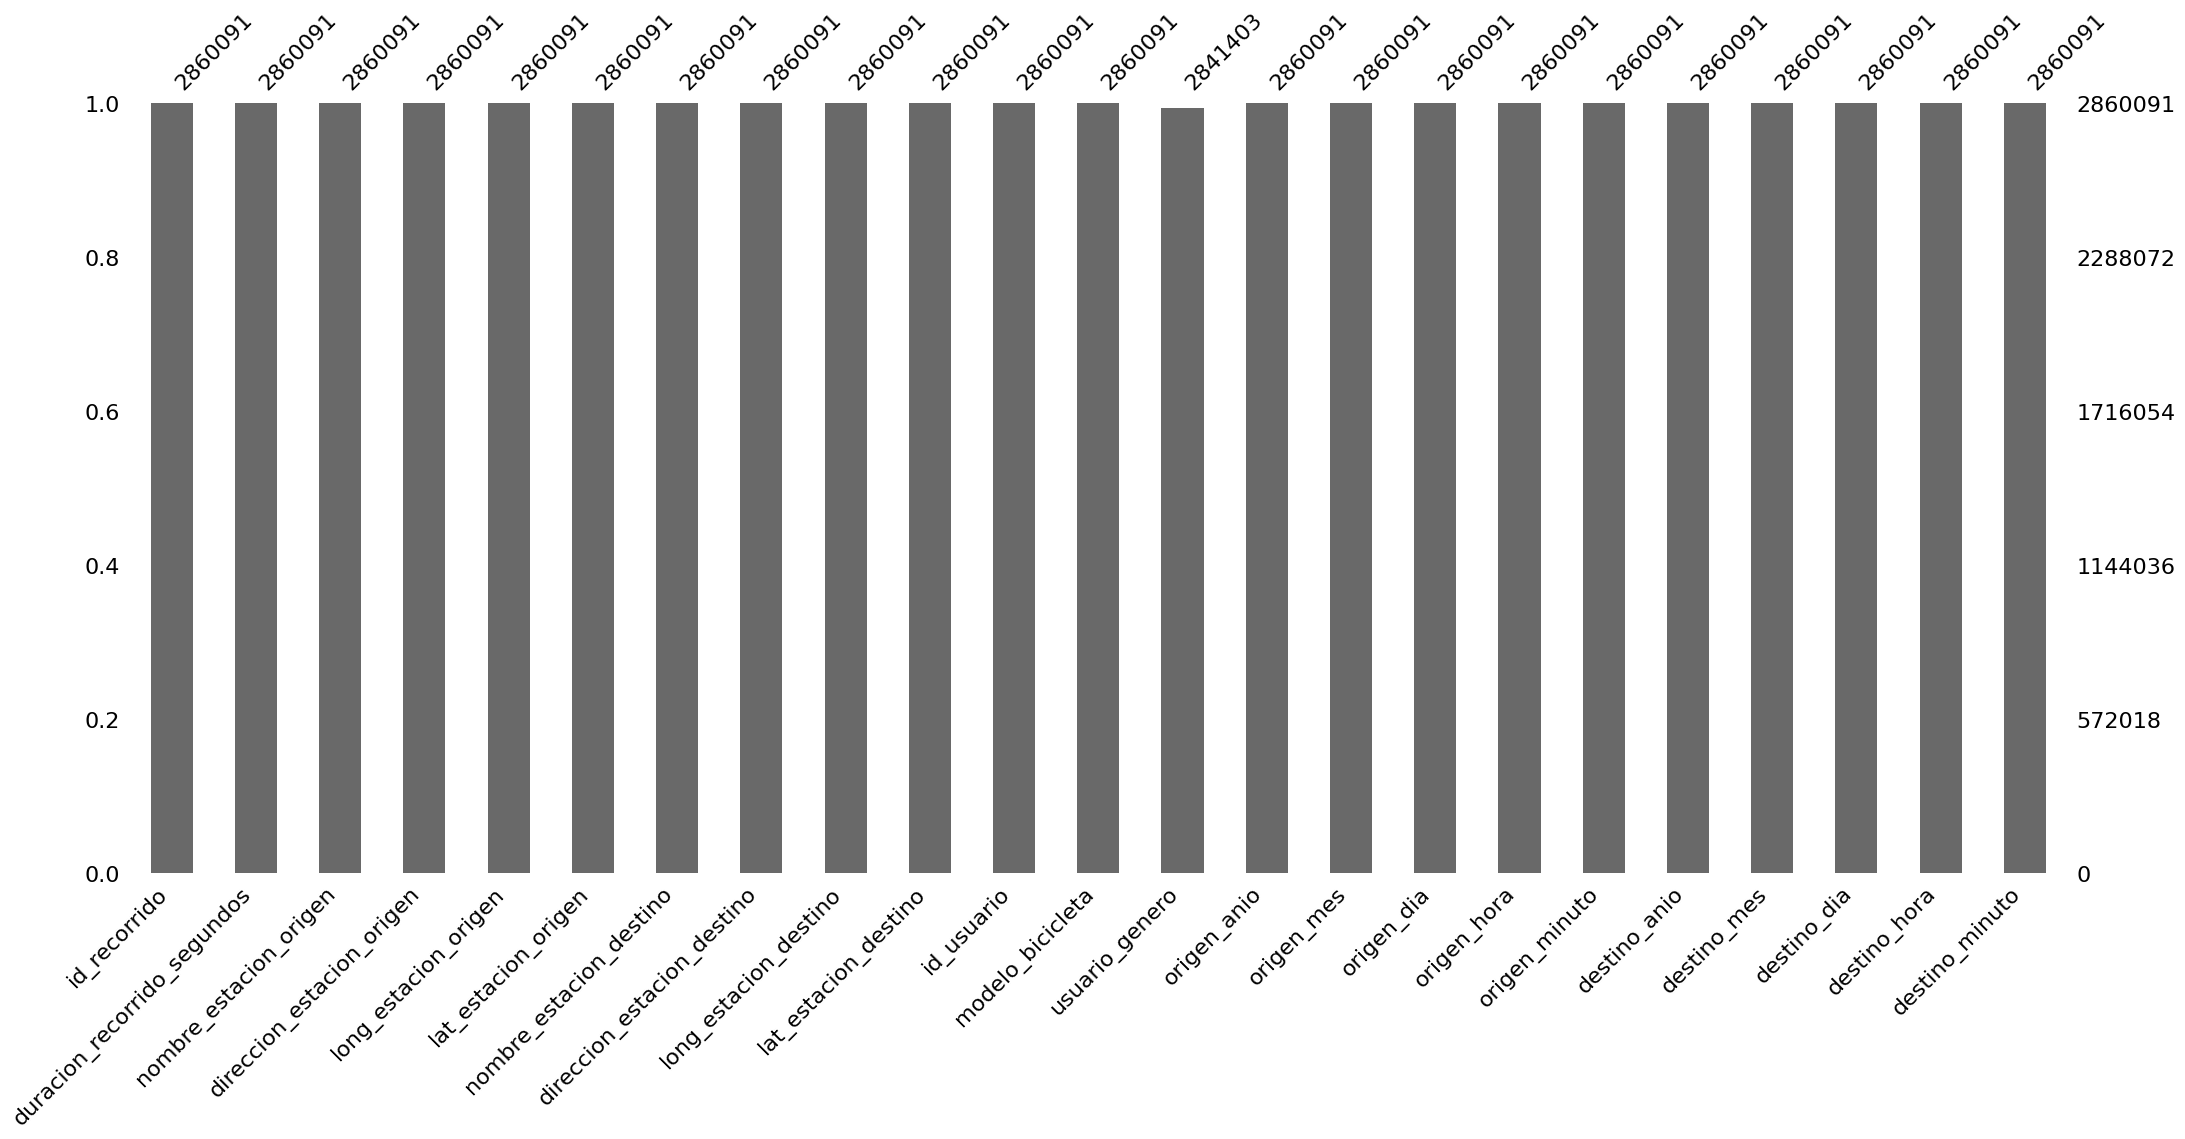

In [ ]:
msno.bar(datos)

In [ ]:
datos

,id_recorrido,duracion_recorrido_segundos,nombre_estacion_origen_x,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen_x,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,...,origen_dia,origen_hora,origen_minuto,destino_anio,destino_mes,destino_dia,destino_hora,destino_minuto,nombre_estacion_origen_y,lat_estacion_origen_y
0,9920899BAEcobici,2026,086 - SAAVEDRA,1019 Saavedra,-58.401681,-34.621268,008 - Congreso,"Cevallos, Virrey& Yrigoyen, Hipolito Av.",-34.609422,"-34.6094218,-58.3893364",...,26,19,58,2021,01,26,20,31,008 - Congreso,-34.609422
1,9918792BAEcobici,1474,197 - PLAZA CIUDAD DE UDINE,Mercedes 1480,-58.493044,-34.620998,009 - Parque Las Heras,"2300 Diaz, Cnel. Av. & French",-34.585443,"-34.585443,-58.407741",...,26,17,37,2021,01,26,18,02,009 - Parque Las Heras,-34.585443
2,9917121BAEcobici,629,165 - PLAZA MONSEÑOR MIGUEL DE ANDREA,Dr Tomas Manuel De Anchorena & Jose A. Cabrera,-58.407614,-34.597048,013 - ONCE,Av. Pueyrredon & Av. Rivadavia,-34.610090,"-34.61009,-58.406",...,26,15,24,2021,01,26,15,35,013 - ONCE,-34.610090
3,9919277BAEcobici,616,020 - DISTRITO AUDIOVISUAL,Conde & Concepción Arenal,-58.444327,-34.580975,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-34.577424,"-34.577424,-58.426387",...,26,18,11,2021,01,26,18,21,014 - Pacifico,-34.577424
4,9921579BAEcobici,684,044 - Ecoparque,"Av. Del Libertador, 3260",-58.413883,-34.575515,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-34.577424,"-34.577424,-58.426387",...,26,20,38,2021,01,26,20,49,014 - Pacifico,-34.577424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860086,12948481BAEcobici,1578,096 - Carlos Gardel,3302 Guardia Vieja & Aguero,-58.411659,-34.602781,387 - Luna,201 Luna,-34.638584,"-34.638584,-58.39965",...,10,18,28,2021,12,10,18,54,387 - Luna,-34.638584
2860087,12941783BAEcobici,3008,205 - SAN MARTIN,1471 Cucha Cucha,-58.453475,-34.605567,227 -Club Ciudad de Buenos Aires,Miguel Sanchez y Av Libertadores,-34.544503,"-34.544503,-58.459499",...,10,10,36,2021,12,10,11,26,227 -Club Ciudad de Buenos Aires,-34.544503
2860088,12947405BAEcobici,2072,268 - Plaza Aristóbulo Del Valle,Campana Y MARCOS SASTRE,-58.493141,-34.606160,110 - PLAZA CD DE BANFF,ROMA 786,-34.628050,"-34.62805,-58.52174",...,10,17,29,2021,12,10,18,04,110 - PLAZA CD DE BANFF,-34.628050
2860089,12942998BAEcobici,1246,221 - CULPINA,Culpina 121,-58.466143,-34.631705,219 - Parque Chacabuco II,ASAMBLEA 1400,-34.636275,"-34.636275,-58.444041",...,10,12,36,2021,12,10,12,56,219 - Parque Chacabuco II,-34.636275


#### Columnas de fechas

In [ ]:
datos['origen_anio'] = pd.to_numeric(datos['origen_anio'])
datos['origen_mes'] = pd.to_numeric(datos['origen_mes'])
datos['origen_dia'] = pd.to_numeric(datos['origen_dia'])
datos['origen_hora'] = pd.to_numeric(datos['origen_hora'])
datos['origen_minuto'] = pd.to_numeric(datos['origen_minuto'])

In [ ]:
datos['destino_anio'] = pd.to_numeric(datos['destino_anio'])
datos['destino_mes'] = pd.to_numeric(datos['destino_mes'])
datos['destino_dia'] = pd.to_numeric(datos['destino_dia'])
datos['destino_hora'] = pd.to_numeric(datos['destino_hora'])
datos['destino_minuto'] = pd.to_numeric(datos['destino_minuto'])

## Valores nulos

In [ ]:
common_na_strings = ["missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",]

common_na_numbers =[-9, -99, -999, -9999, 9999, 66, 77, 88, -1]


In [ ]:
datos = (
    datos
    .replace(
        to_replace=common_na_strings,  #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    )
)

In [ ]:
datos = (
    datos
    .replace(
        to_replace=common_na_numbers,  #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    )
)

<Axes: >

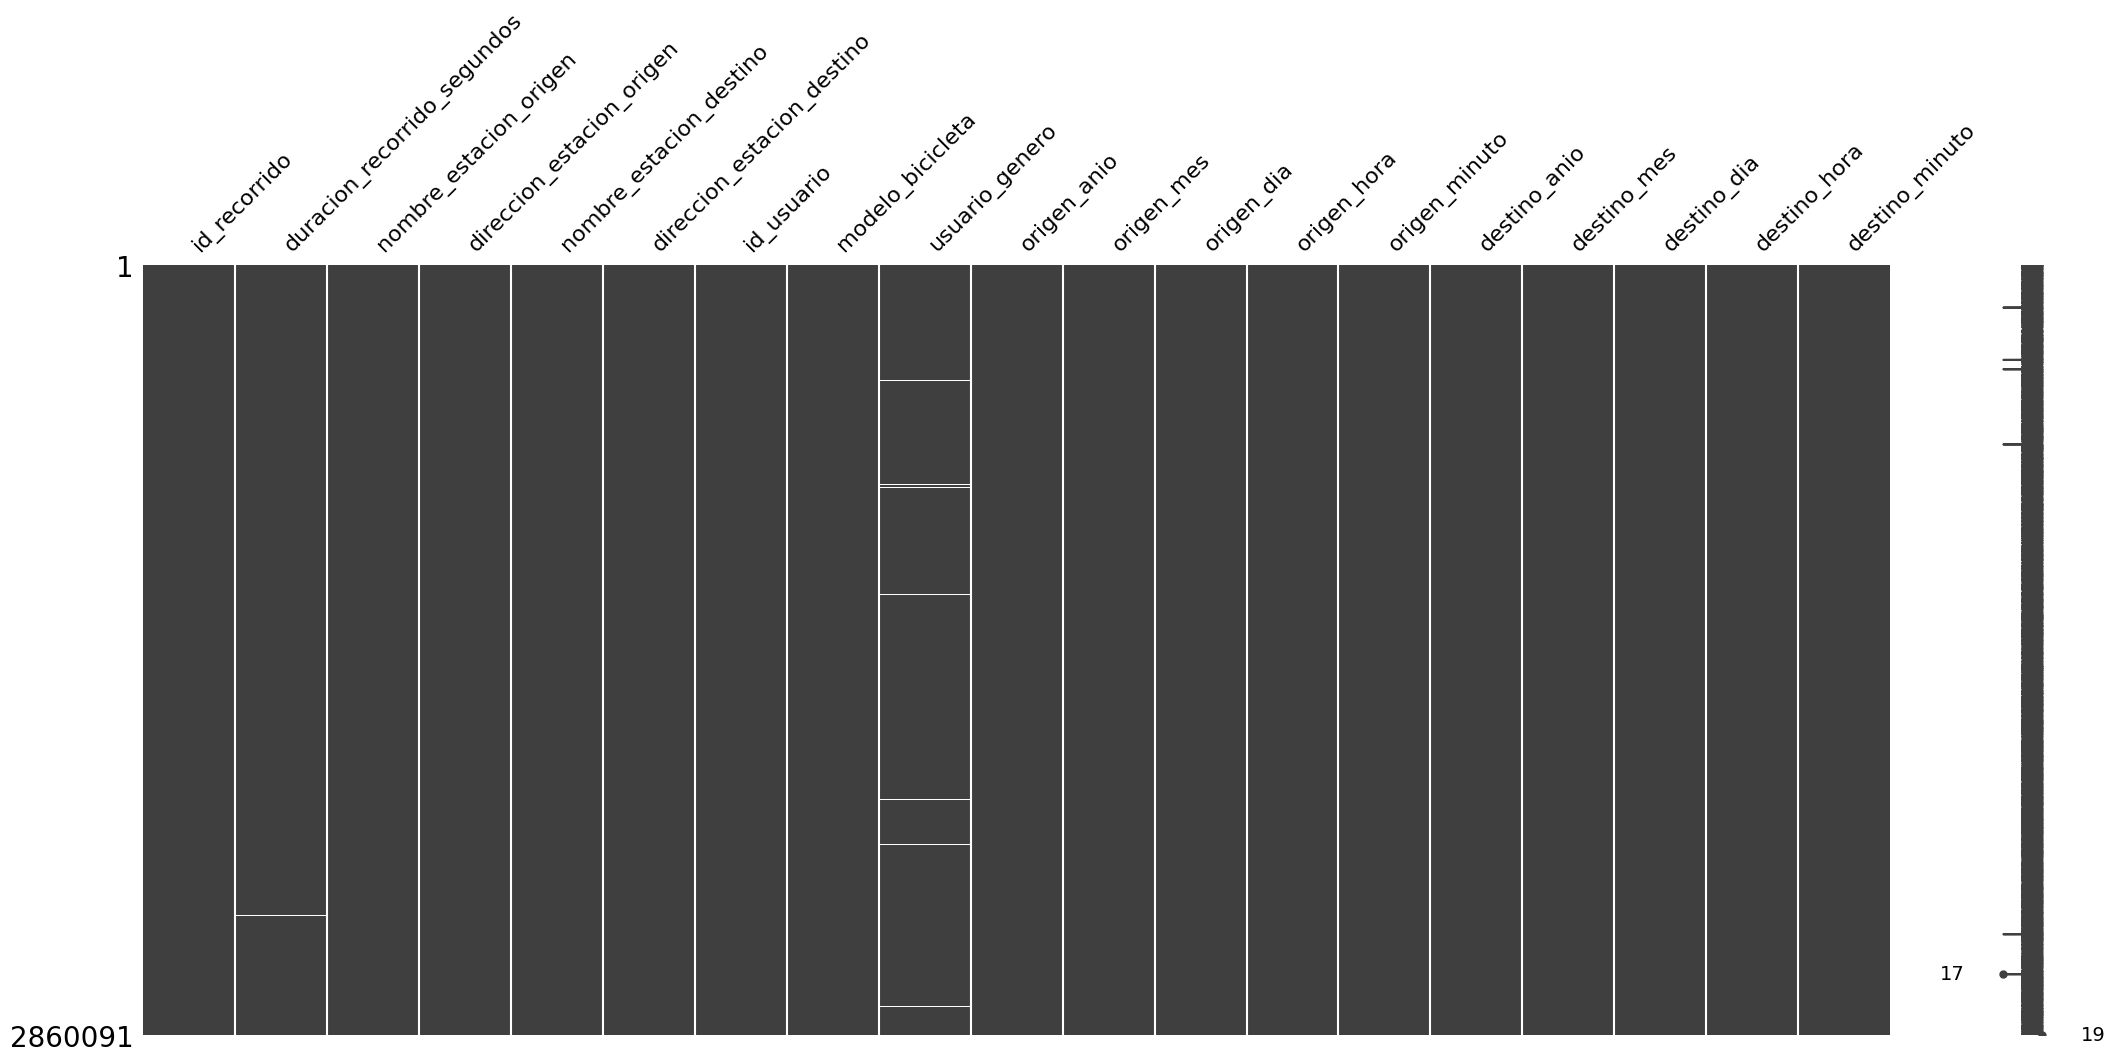

In [ ]:
#Matriz con valores nulos
msno.matrix(datos)

In [ ]:
#Muestra las columnas que contienen al menos un valor nulo
datos.isnull().any()

id_recorrido                   False
duracion_recorrido_segundos     True
nombre_estacion_origen         False
direccion_estacion_origen      False
nombre_estacion_destino        False
direccion_estacion_destino     False
id_usuario                     False
modelo_bicicleta               False
usuario_genero                  True
origen_anio                    False
origen_mes                     False
origen_dia                     False
origen_hora                    False
origen_minuto                  False
destino_anio                   False
destino_mes                    False
destino_dia                    False
destino_hora                   False
destino_minuto                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [ ]:
datos.isnull().sum()

id_recorrido                       0
duracion_recorrido_segundos      805
nombre_estacion_origen             0
direccion_estacion_origen          0
nombre_estacion_destino            0
direccion_estacion_destino         0
id_usuario                         0
modelo_bicicleta                   0
usuario_genero                 18688
origen_anio                        0
origen_mes                         0
origen_dia                         0
origen_hora                        0
origen_minuto                      0
destino_anio                       0
destino_mes                        0
destino_dia                        0
destino_hora                       0
destino_minuto                     0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [ ]:
#Devuelve la suma de la suma de los valores nulos por columna
total_nulos = datos.isnull().sum().sum()
total_nulos

19493

## ¿Cuál es la proporción de valores nulos por cada variable?

<Axes: >

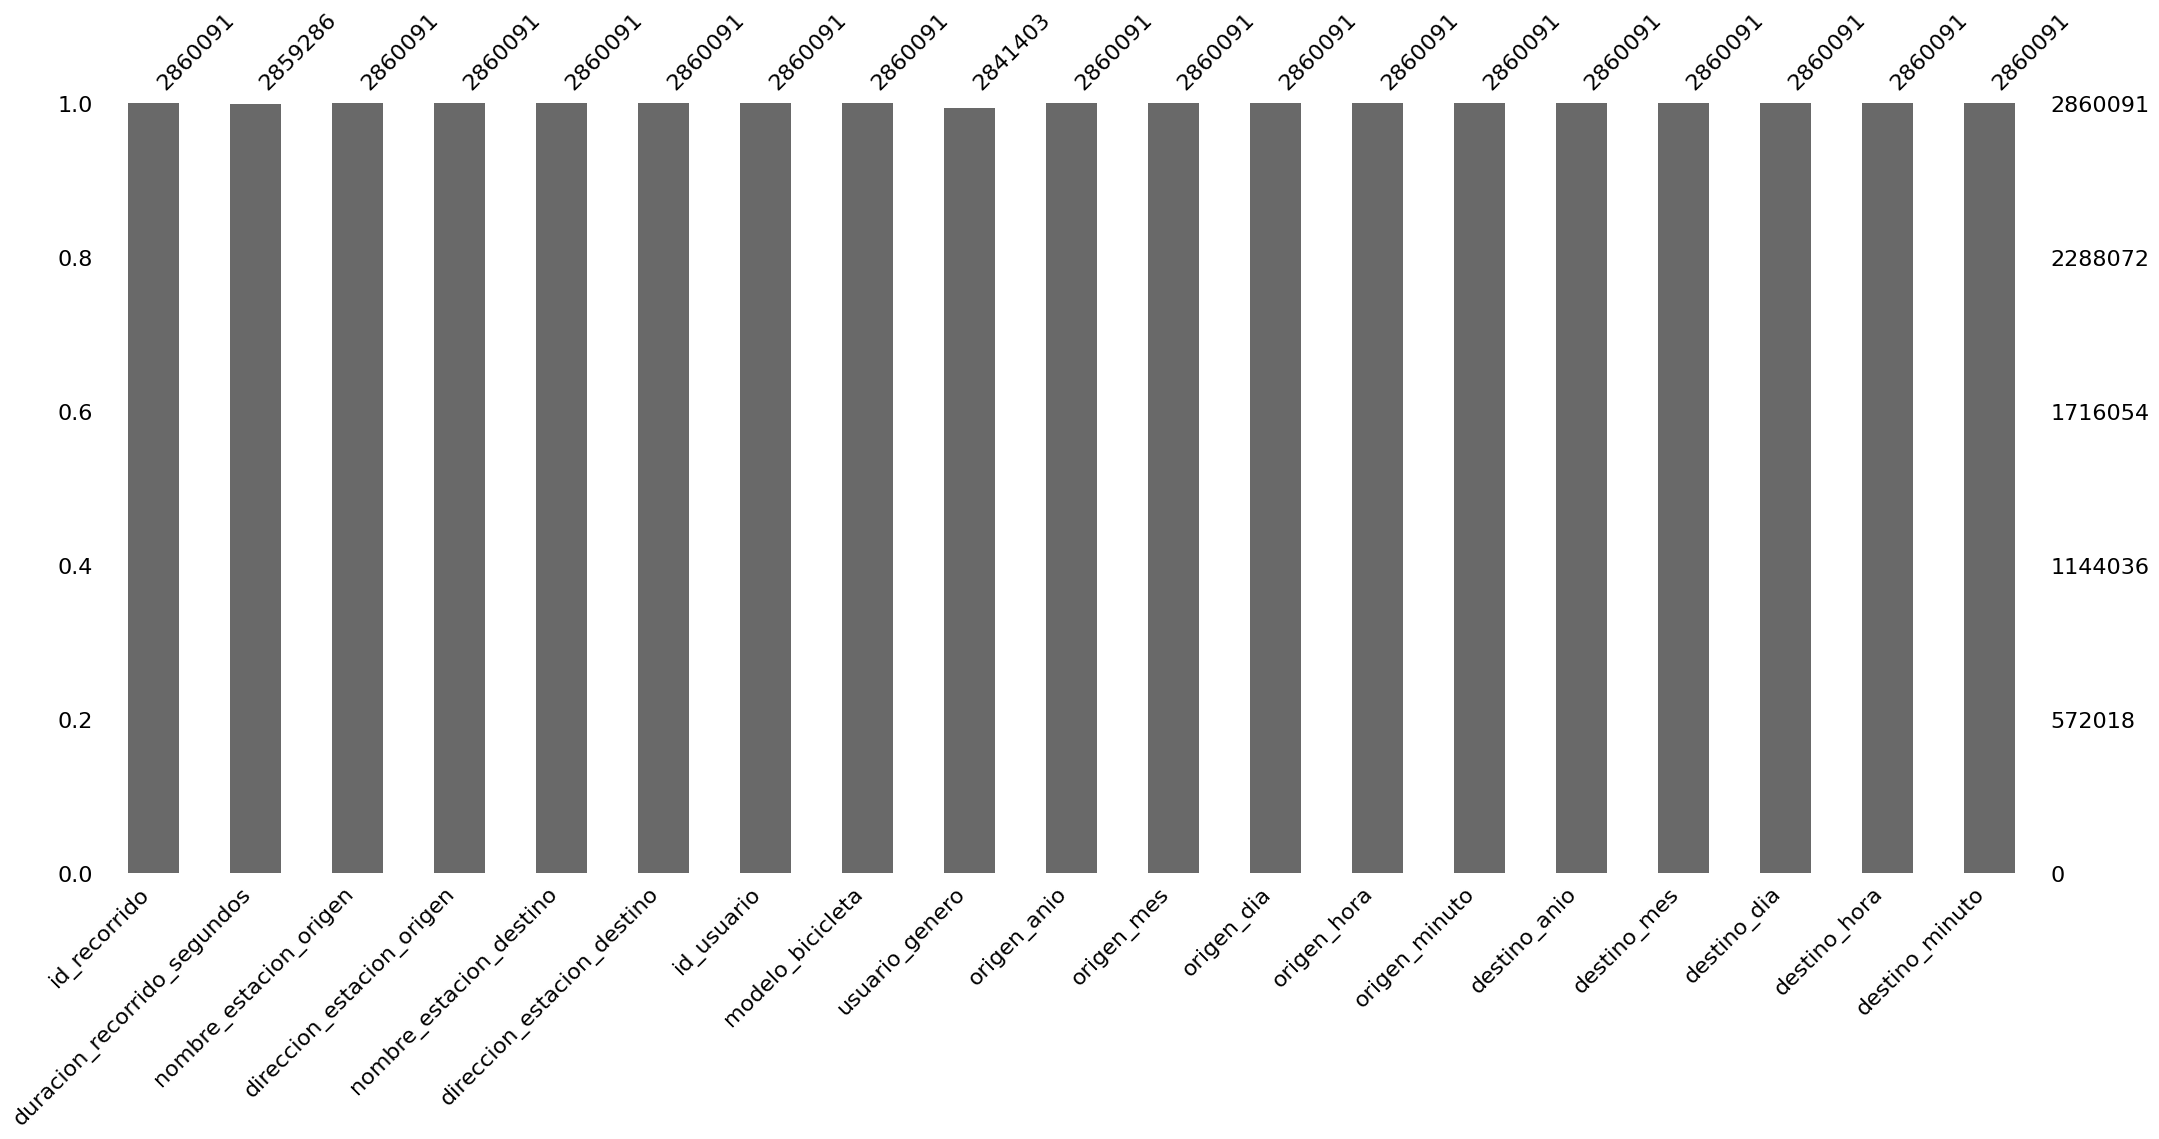

In [ ]:
msno.bar(datos)

### Valores faltantes implicitos

In [ ]:
##no coresponde

## Guardado del archivo CSV limpio

In [ ]:
# Guarda el DataFrame limpio en un nuevo archivo CSV
datos.to_csv('./01_limpieza_ecobici.csv', index=False)